## NOTEBOOK 04

In this notebook we will explore some Molecular Dynamics (MD) code implementation, in order to carry out a simulation of a Lennard-Jones fluid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### EXERCISE 04.1

The first thing to add to the Mol_DynNVE code is a way to $\textit{restart}$ the simultation, in order to equilibrate the system to the temperature we would like to set it at.

In my code, this is done in the following way:

1. First, a standard simulation that extrapolates $\vec{r}(t-dt)$ by initializing random velocities and rescaling them to obtain the desired temperature is carried out. During this simulation, not only the final configuration is saved in <font face="Courier">config.final</font> but also the penultimate is saved in <font face="Courier">old.final</font>.
2. The contents of <font face="Courier">old.final</font> and <font face="Courier">config.final</font> are copied into <font face="Courier">old.0</font> and <font face="Courier">config.0</font>, respectively, in order to create the new input configuration for the next simulation.
3. Now,with the restart option activated, we read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files, namely <font face="Courier">config.0</font> and <font face="Courier">old.0</font>.
4. We now compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm and use it, together with $\vec{r}(t-dt)$ to compute $\vec{v}(t)$ and obtain the actual temperature $T(t)$
5. by comparing $T(t)$ with the desired/target temperature  $T^\star$ extract a scaling factor $f=\sqrt{\frac{T^\star}{T(t)}}$ for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
6. we then use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
7. Finally, we use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation


By repeating the restarting procedure from point 2, the system is equilibrated and ready to start a simulation of real physical quantities.

Here below I show the equilibration of the systems by plotting the istantaneous temperatures for different restarts.

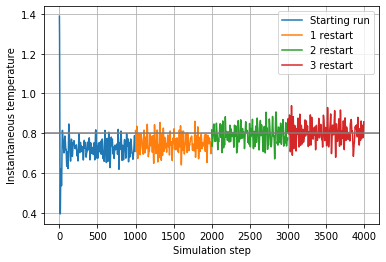

In [2]:
temp1=open('./Equilibration/output_temp1.dat','r').read().split('\n')
temp2=open('./Equilibration/output_temp2.dat','r').read().split('\n')
temp3=open('./Equilibration/output_temp3.dat','r').read().split('\n')
temp4=open('./Equilibration/output_temp4.dat','r').read().split('\n')


x1=[i for i in range(len(temp1)-1)]
x2=[i for i in range(len(temp1)-1,len(temp1)+len(temp2)-2)]
x3=[i for i in range(2*len(temp1)-2,3*len(temp1)-3)]
x4=[i for i in range(3*len(temp1)-3,4*len(temp1)-4)]
y1=[]
y2=[]
y3=[]
y4=[]


for i in range(len(temp1)-1):
    y1.append(float(temp1[i]))
    y2.append(float(temp2[i]))
    y3.append(float(temp3[i]))
    y4.append(float(temp4[i]))
    
plt.plot(x1,y1,label='Starting run')
plt.plot(x2,y2,label='1 restart')
plt.plot(x3,y3,label= '2 restart')
plt.plot(x4,y4,label='3 restart')

plt.xlabel('Simulation step')
plt.ylabel('Instantaneous temperature')
plt.axhline(0.8,color='grey')
plt.grid(True)
plt.legend()
plt.show()

plt.close()


As we can see, by restarting the simulation multiple times, the temperature of the system approaches on average the target.

### EXERCISE 04.2

Until now, simulation calculated only the instantaneous values of $E_{pot}$,$E_{k}$,$E_{tot}$ and $T$, without estimation of the error. Thus, we introduce in this step the blocking method in order to calculate also the error on the mean values we obtain.

In the following a block calculation of the different values is shown. It is important to notice that, in this case, the system han **not** been equilibrated. The only purpose is to show the blocking method in action.

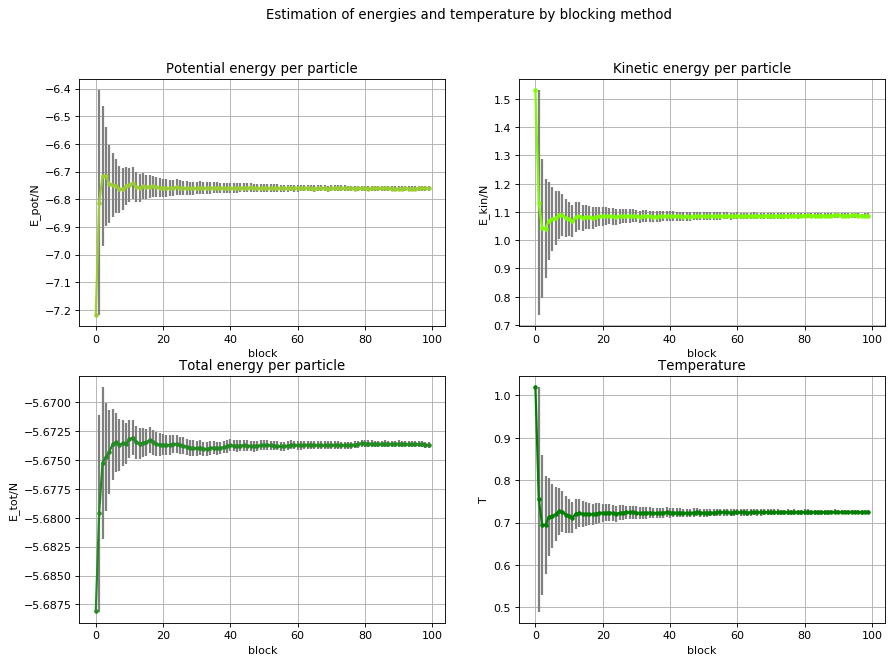

In [7]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2,figsize=(13,9),dpi=80)

# Potential energy

data1=open('Generic_block/ave_epot.dat','r').read().split('\n')
x=[i for i in range(len(data1)-1)]

data1=[x.split(',') for x in data1]


y1= np.zeros(len(data1)-1)
y1_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    y1[i]=data1[i][0]
    y1_err[i]=data1[i][1]

# Kinetic energy

data2=open('Generic_block/ave_ekin.dat','r').read().split('\n')

data2=[x.split(',') for x in data2]


y2= np.zeros(len(data2)-1)
y2_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    y2[i]=data2[i][0]
    y2_err[i]=data2[i][1]

# Total energy

data3=open('Generic_block/ave_etot.dat','r').read().split('\n')

data3=[x.split(',') for x in data3]


y3= np.zeros(len(data3)-1)
y3_err= np.zeros(len(data3)-1)

for i in range(len(data3)-1):
    y3[i]=data3[i][0]
    y3_err[i]=data3[i][1]
    
# Temperature

data4=open('Generic_block/ave_temp.dat','r').read().split('\n')

data4=[x.split(',') for x in data4]


y4= np.zeros(len(data4)-1)
y4_err= np.zeros(len(data4)-1)

for i in range(len(data4)-1):
    y4[i]=data4[i][0]
    y4_err[i]=data4[i][1]

## Now we create the plot

ax1.errorbar(x,y1,yerr=y1_err,color='yellowgreen',marker=".",lw=2,ecolor='gray')
ax1.set_title('Potential energy per particle')
ax1.set(xlabel='block', ylabel='E_pot/N')

ax2.errorbar(x,y2,yerr=y2_err,color='lawngreen',marker=".",lw=2,ecolor='gray')
ax2.set_title('Kinetic energy per particle')
ax2.set(xlabel='block', ylabel='E_kin/N')

ax3.errorbar(x,y3,yerr=y3_err, color='forestgreen',marker=".",lw=2,ecolor='gray')
ax3.set_title('Total energy per particle')
ax3.set(xlabel='block', ylabel='E_tot/N')

ax4.errorbar(x,y4,yerr=y4_err, color='g',marker=".",lw=2,ecolor='gray')
ax4.set_title('Temperature')
ax4.set(xlabel='block', ylabel='T')

fig.suptitle("Estimation of energies and temperature by blocking method")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()

### EXERCISE 04.3

Finally we can see the complete simulation procedure. In this case, the element simulated is the noble gas Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Here is important to notice that the system has been equilibrated before measuring the data showed below.

All the values are show in SI units.

In [9]:
#Argon data
sigma=0.34*10**(-9)
r=120
mass=39.948*1.66054*10**(-27)
K=1.3806*10**(-23)
eps=r*K

### Solid phase

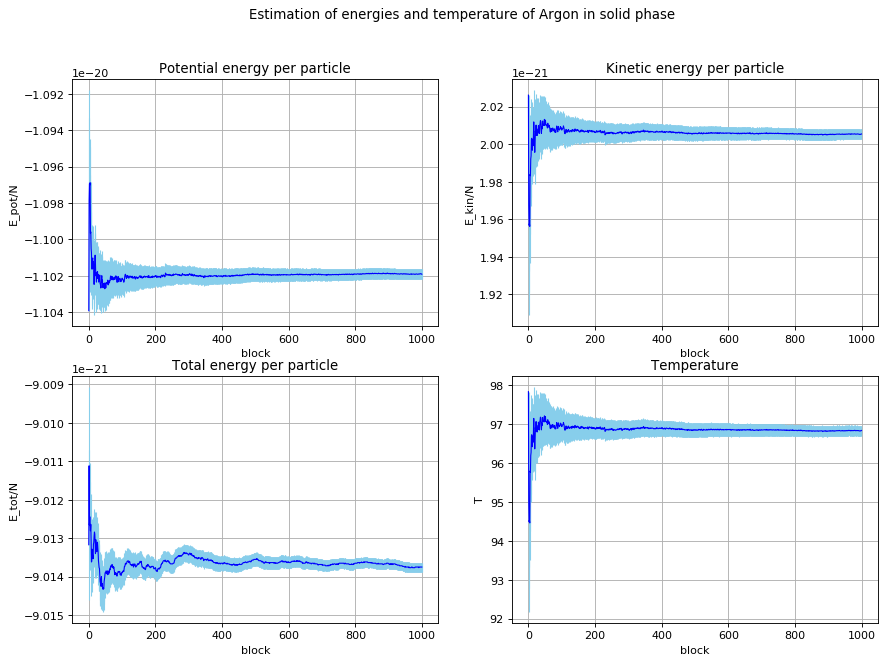

In [15]:
## Argon in solid phase
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2,figsize=(13,9),dpi=80)

# Potential energy

data1=open('Solid_argon/ave_epot.dat','r').read().split('\n')
x=[i for i in range(len(data1)-1)]

data1=[x.split(',') for x in data1]


y1= np.zeros(len(data1)-1)
y1_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    y1[i]=data1[i][0]
    y1_err[i]=data1[i][1]

# Kinetic energy

data2=open('Solid_argon/ave_ekin.dat','r').read().split('\n')

data2=[x.split(',') for x in data2]


y2= np.zeros(len(data2)-1)
y2_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    y2[i]=data2[i][0]
    y2_err[i]=data2[i][1]

# Total energy

data3=open('Solid_argon/ave_etot.dat','r').read().split('\n')

data3=[x.split(',') for x in data3]


y3= np.zeros(len(data3)-1)
y3_err= np.zeros(len(data3)-1)

for i in range(len(data3)-1):
    y3[i]=data3[i][0]
    y3_err[i]=data3[i][1]
    
# Temperature

data4=open('Solid_argon/ave_temp.dat','r').read().split('\n')

data4=[x.split(',') for x in data4]


y4= np.zeros(len(data4)-1)
y4_err= np.zeros(len(data4)-1)

for i in range(len(data4)-1):
    y4[i]=data4[i][0]
    y4_err[i]=data4[i][1]

## Now we create the plot

ax1.errorbar(x,y1*eps,yerr=y1_err*eps,color='blue',lw=1,ecolor='skyblue')
ax1.set_title('Potential energy per particle')
ax1.set(xlabel='block', ylabel='E_pot/N')

ax2.errorbar(x,y2*eps,yerr=y2_err*eps,color='blue',lw=1,ecolor='skyblue')
ax2.set_title('Kinetic energy per particle')
ax2.set(xlabel='block', ylabel='E_kin/N')

ax3.errorbar(x,y3*eps,yerr=y3_err*eps, color='blue',lw=1,ecolor='skyblue')
ax3.set_title('Total energy per particle')
ax3.set(xlabel='block', ylabel='E_tot/N')

ax4.errorbar(x,y4*r,yerr=y4_err*r, color='blue',lw=1,ecolor='skyblue')
ax4.set_title('Temperature')
ax4.set(xlabel='block', ylabel='T')

fig.suptitle("Estimation of energies and temperature of Argon in solid phase")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()

In this case it is worth notice that, since we are simulating a microcanonical ensemble, the total energy variations are supposed to be very small compared to the other quantities. This is what we see in the solid case. 

### Liquid phase

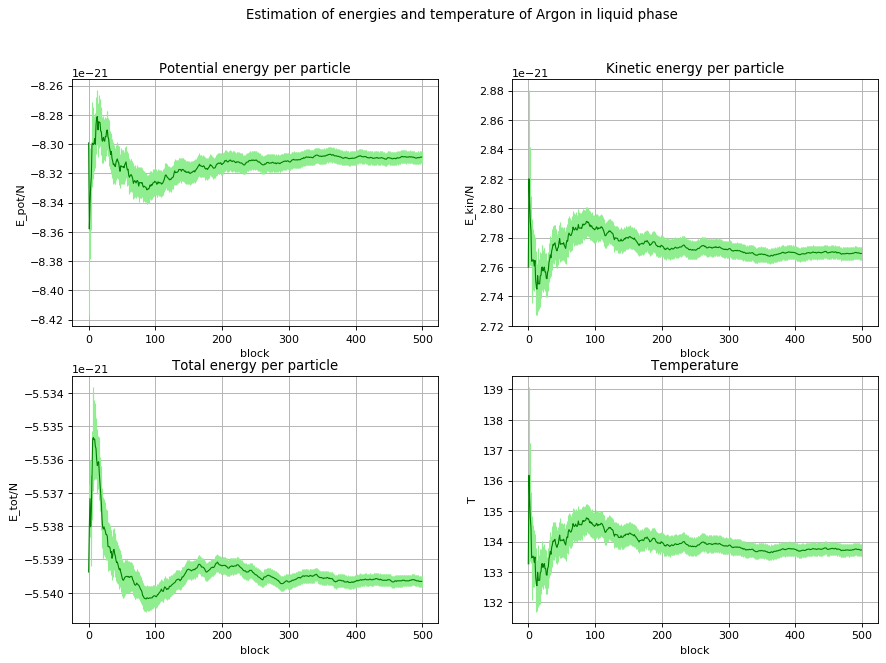

In [16]:
## Argon in liquid phase
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2,figsize=(13,9),dpi=80)

# Potential energy

data1=open('Liquid_argon/ave_epot.dat','r').read().split('\n')
x=[i for i in range(len(data1)-1)]

data1=[x.split(',') for x in data1]


y1= np.zeros(len(data1)-1)
y1_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    y1[i]=data1[i][0]
    y1_err[i]=data1[i][1]

# Kinetic energy

data2=open('Liquid_argon/ave_ekin.dat','r').read().split('\n')

data2=[x.split(',') for x in data2]


y2= np.zeros(len(data2)-1)
y2_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    y2[i]=data2[i][0]
    y2_err[i]=data2[i][1]

# Total energy

data3=open('Liquid_argon/ave_etot.dat','r').read().split('\n')

data3=[x.split(',') for x in data3]


y3= np.zeros(len(data3)-1)
y3_err= np.zeros(len(data3)-1)

for i in range(len(data3)-1):
    y3[i]=data3[i][0]
    y3_err[i]=data3[i][1]
    
# Temperature

data4=open('Liquid_argon/ave_temp.dat','r').read().split('\n')

data4=[x.split(',') for x in data4]


y4= np.zeros(len(data4)-1)
y4_err= np.zeros(len(data4)-1)

for i in range(len(data4)-1):
    y4[i]=data4[i][0]
    y4_err[i]=data4[i][1]

## Now we create the plot

ax1.errorbar(x,y1*eps,yerr=y1_err*eps,color='green',lw=1,ecolor='lightgreen')
ax1.set_title('Potential energy per particle')
ax1.set(xlabel='block', ylabel='E_pot/N')
ax2.errorbar(x,y2*eps,yerr=y2_err*eps,color='green',lw=1,ecolor='lightgreen')
ax2.set_title('Kinetic energy per particle')
ax2.set(xlabel='block', ylabel='E_kin/N')
ax3.errorbar(x,y3*eps,yerr=y3_err*eps, color='green',lw=1,ecolor='lightgreen')
ax3.set_title('Total energy per particle')
ax3.set(xlabel='block', ylabel='E_tot/N')
ax4.errorbar(x,y4*r,yerr=y4_err*r, color='green',lw=1,ecolor='lightgreen')
ax4.set_title('Temperature')
ax4.set(xlabel='block', ylabel='T')

fig.suptitle("Estimation of energies and temperature of Argon in liquid phase")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()

Again, total energy varitions are really small compared to the others.

### Gas phase

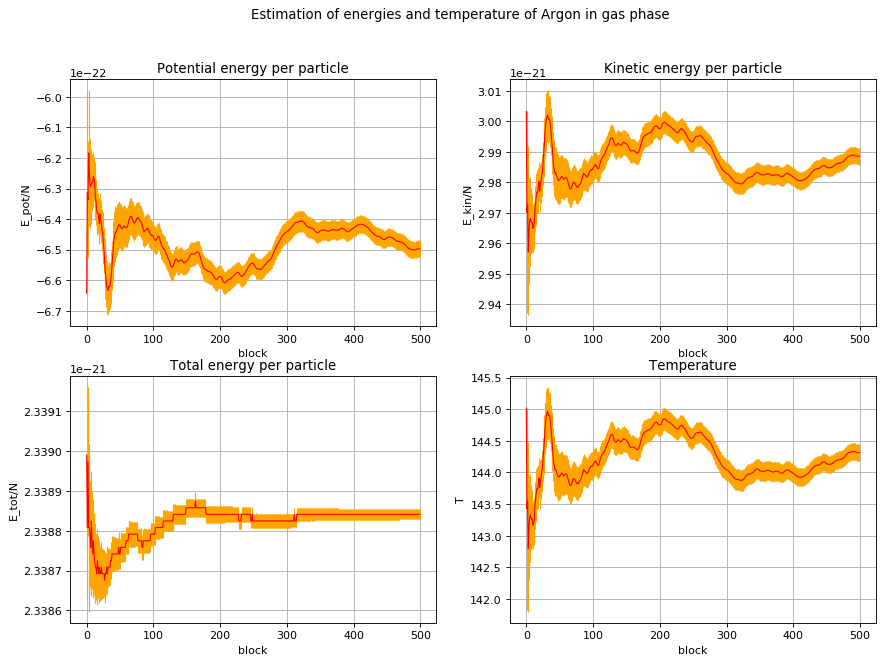

In [19]:
## Argon in gas phase
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2,figsize=(13,9),dpi=80)

# Potential energy

data1=open('Gas_argon/ave_epot.dat','r').read().split('\n')
x=[i for i in range(len(data1)-1)]

data1=[x.split(',') for x in data1]


y1= np.zeros(len(data1)-1)
y1_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    y1[i]=data1[i][0]
    y1_err[i]=data1[i][1]

# Kinetic energy

data2=open('Gas_argon/ave_ekin.dat','r').read().split('\n')

data2=[x.split(',') for x in data2]


y2= np.zeros(len(data2)-1)
y2_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    y2[i]=data2[i][0]
    y2_err[i]=data2[i][1]

# Total energy

data3=open('Gas_argon/ave_etot.dat','r').read().split('\n')

data3=[x.split(',') for x in data3]


y3= np.zeros(len(data3)-1)
y3_err= np.zeros(len(data3)-1)

for i in range(len(data3)-1):
    y3[i]=data3[i][0]
    y3_err[i]=data3[i][1]
    
# Temperature

data4=open('Gas_argon/ave_temp.dat','r').read().split('\n')

data4=[x.split(',') for x in data4]


y4= np.zeros(len(data4)-1)
y4_err= np.zeros(len(data4)-1)

for i in range(len(data4)-1):
    y4[i]=data4[i][0]
    y4_err[i]=data4[i][1]

## Now we create the plot

ax1.errorbar(x,y1*eps,yerr=y1_err*eps,color='red',lw=1,ecolor='orange')
ax1.set_title('Potential energy per particle')
ax1.set(xlabel='block', ylabel='E_pot/N')
ax2.errorbar(x,y2*eps,yerr=y2_err*eps,color='red',lw=1,ecolor='orange')
ax2.set_title('Kinetic energy per particle')
ax2.set(xlabel='block', ylabel='E_kin/N')
ax3.errorbar(x,y3*eps,yerr=y3_err*eps, color='red',lw=1,ecolor='orange')
ax3.set_title('Total energy per particle')
ax3.set(xlabel='block', ylabel='E_tot/N')
ax4.errorbar(x,y4*r,yerr=y4_err*r, color='red',lw=1,ecolor='orange')
ax4.set_title('Temperature')
ax4.set(xlabel='block', ylabel='T')

fig.suptitle("Estimation of energies and temperature of Argon in gas phase")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()

Finally, also in the gas phase the total energy varies less than other quantities. This guarentees the microcanonicity of the enesemble.